In [41]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [42]:
df=pd.read_csv("E:\\LEARNBAY\\Project SUbmission ML\\BANKRUPTCY_PREDICTION.csv")
df.head(3)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan �,Operating Profit Per Share (Yuan �,Per Share Net profit before tax (Yuan �,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.

In [43]:
df.shape

(6819, 95)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [45]:
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)
pd.set_option("display.width",1000)
#Setting the display setting as all the columns are not being displayed. 

In [46]:
df.duplicated().sum()
#No duplicate data present. 

0

# Pre-Processing starts

In [47]:
# 1. Missing Data Treatment

df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Value Per Share (B)                                    0
 Net Val

NO DATA IS MISSING. NO NEED TO DO ANY MODIFICATION.

In [48]:
# 2. Outliers Treatment

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A) before interest and % after tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating Gross Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized Sales Gross Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating Profit Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax net Interest Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax net Interest Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry income and expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00
Continuous interest rate (after tax),6819.0,7.813814e-01,1.267900e-02,0.0,7.815668e-01,7.816350e-01,7.817354e-01,1.000000e+00


Variations are seen in few cases:  
1. Operating Expense Rate
2. Research and development expense rate  
3. Interest-bearing debt interest rate
4. Revenue Per Share (Yuan �
5. Total Asset Growth Rate
6. Net Value Growth Rate
7. Current Ratio
8. Quick Ratio
9. Total debt/Total net worth
10. Accounts Receivable Turnover 
11. Average Collection Days
12. Inventory Turnover Rate (times) 
13. Fixed Assets Turnover Frequency
14. Allocation rate per person
15. Quick Assets/Current Liability
16. Cash/Current Liability 
17. Inventory/Current Liability
18. Long-term Liability to Current Assets
19. Current Asset Turnover Rate 
20. Quick Asset Turnover Rate
21. Cash Turnover Rate
22. Fixed Assets to Assets
23. Total assets to GNP price

But for now we are not going to do any outlier treatment beacause:
a. Logistic Regression, Decision Tree, Random Forest and Support Vector Machine does not gets impacted by the outliers. 
b. Value is ranging from 0 to a max value and since it deals with company's investment, max value is going to be large. We will 
not be changing it in any case. 

OUTLIER TREATMENT COMPLETES.

3. Encoding

ENcoding is not required as all the features are already int or float. 

In [49]:
# 4. Imbalance dataset. 

df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

4. Dataset is imbalanced. We will have to have more rows with 1 records. For now, we will leave this...this will be taken care of the same if the model doesn't run fine. 

5. Feature Scaling - Very important for KNNWe will again handle it after spliting the data

This is end of Pre-Processing Step.

# Exploratory Data Analysis

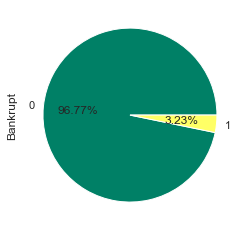

0    6599
1     220
Name: Bankrupt, dtype: int64

In [62]:
df['Bankrupt'].value_counts().plot(kind='pie',autopct ='%.2f%%',cmap='summer')
plt.show()
# Note : Data is imbalanced. 
df['Bankrupt'].value_counts()


In [51]:
for i in df.columns:
    if len(df[i].unique()) < 2:
        print(i)
        print(len(df[i].unique()),'\n',df[i].value_counts())
        print()
    
# Note : Checking if any column has just one value...so that we can delete that column. But there are none.

In [52]:
corr_mat = df.corr()
corr_mat

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan �,Operating Profit Per Share (Yuan �,Per Share Net profit before tax (Yuan �,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
ROA(C) before interest and depreciation before interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,-0.161671,-0.035729,0.685028,0.753339,-0.109888,0.210622,-0.033947,0.007019,-0.062660,-0.065919,0.022896,-0.014834,0.301996,-0.012543,0.259680,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416,-0.260807
ROA(A) before interest and % after tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.531790,0.531821,0.764828,0.326239,-0.011829,0.654253,0.752578,0.003277,0.042208,0.125384,0.125872,0.024887,0.026977,-0.063970,0.081982,0.263615,0.014102,-0.018412,0.005440,-0.010323,-0.259972,0.259972,0.020707,-0.161868,-0.0361

In [53]:
# Heatmap was not clearly visible due to too much data. So to find out which are the highly positively or negatively correalted 
# columns, and to delete them, the following codes are written.

drop_list = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if (corr_mat.iloc[i,j] >= 0.95 or corr_mat.iloc[i,j] <= -0.95):
#             print(i,j,corr_mat.iloc[i,j],corr_mat.columns[j],corr_mat.columns[i])
            if corr_mat.columns[j] not in drop_list:
                drop_list.append(corr_mat.columns[j])
            
drop_list

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' Operating Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons',
 ' After-tax Net Profit Growth Rate',
 ' Debt ratio %',
 ' Operating Profit Per Share (Yuan �',
 ' Per Share Net profit before tax (Yuan �',
 ' Current Liabilities/Liability',
 ' Current Liabilities/Equity',
 ' Realized Sales Gross Margin',
 ' Borrowing dependency',
 ' Current Liability to Equity']

In [54]:
len(drop_list)
df1 = df
df1.shape
# These 17 variables can be dropped...as if not dropped they will cause the issue of multicolinearity. 

(6819, 95)

In [55]:
for i in drop_list:
    df1 = df1.drop([i],axis=1)
    
df1.shape

(6819, 78)

In [56]:
for i in df1.columns:
    print(i)

 ROA(B) before interest and depreciation after tax
 Operating Profit Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (C)
 Cash Flow Per Share
 Revenue Per Share (Yuan �
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate Ratio
 Cash Reinvestment %
 Current Ratio
 Quick Ratio
 Interest Expense Ratio
 Total debt/Total net worth
 Net worth/Assets
 Long-term fund suitability ratio (A)
 Contingent liabilities/Net worth
 Operating profit/Paid-in capital
 Net profit before tax/Paid-in capital
 Inventory and accounts receivable/Net value
 Total Asset Turnover
 Accounts Receivable Turnover
 Average Collection Days
 Inventory Turnover Rate (time

## Visualization 

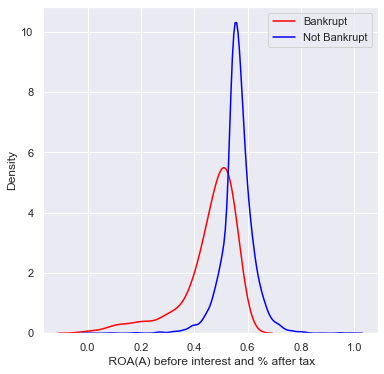

In [57]:
plt.figure(figsize=(6,6))
sns.distplot(df[df['Bankrupt']==1][' ROA(A) before interest and % after tax'],hist=False,label="Bankrupt",color='red')
sns.distplot(df[df['Bankrupt']==0][' ROA(A) before interest and % after tax'],hist=False,label="Not Bankrupt",color='blue')
plt.legend()

###### Insight 1 : When ' ROA(A) before interest and % after tax' ~ 0.5, then Maximum Bankruptcy is seen and beyond 0.7 none is seen.

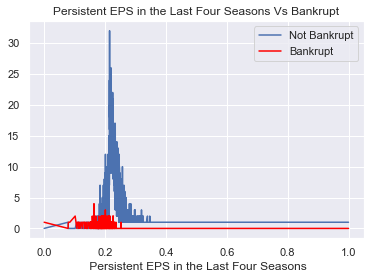

In [18]:
# 2 'Persistent EPS in the Last Four Seasons Vs Bankrupt'

plt.title('Persistent EPS in the Last Four Seasons Vs Bankrupt')
EPS_wise = pd.DataFrame(pd.crosstab(df[' Persistent EPS in the Last Four Seasons'],df['Bankrupt']))
EPS_wise[0].plot(label="Not Bankrupt")
EPS_wise[1].plot(color='red',label ="Bankrupt")
plt.legend()
plt.show()

### Insight 2 :: 

EPS or Earning per Share = (Net Income) / (Total number of shares which are outstanding) 
We see that all the companies which went bankrut, there EPS has been very low. It is not more than 0.22.

EPS indicates how much a company makes for each share of its stock and 
is a widely used metric for estimating corporate value. 

More EPS, better the health of the company. 

Here, we have consildated value of 4 seasons. The bankrupt companies might not have performed well consistenly. 

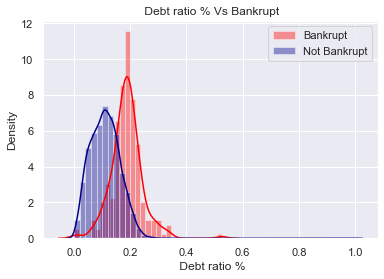

In [19]:
# 3. 'Debt Ratio% Vs Bankrupt' 
plt.title(' Debt ratio % Vs Bankrupt')
sns.distplot(df[df['Bankrupt']==1][' Debt ratio %'],hist=True,label="Bankrupt",color='red')
sns.distplot(df[df['Bankrupt']==0][' Debt ratio %'],hist=True,label="Not Bankrupt",color='darkblue')
plt.legend()
plt.show()

### Insight 3: 

Debt Ratio%  = Total Liabilities/Total Asset Ratio %

Higher value of Debt ratio means either the Total liability is high or the total asset is low. 
For the not-bankrupt, the 'debt ratio%' ranges from - 0 - 0.31 where most of the values are very very low.(only 1 value is 1)
For the bankrupt, the 'debt ratio%' ranges from - 0 - 0.33 where most of the values are very very low.(only 1 value is 0.5)

Mean : 0 -  0.04833669146037284 1 -  0.024831755431818186
Median:  0 -  0.034485994 1 -  0.018662388000000002


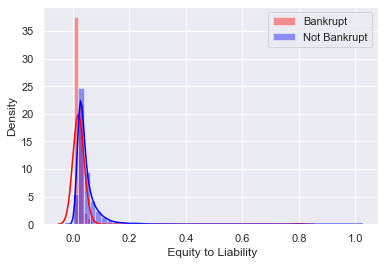

In [20]:
# 4. 'Bankrupt Vs Equity to Liability'
sns.distplot(df[df['Bankrupt']==1][' Equity to Liability'],hist=True,label="Bankrupt",color='red')
sns.distplot(df[df['Bankrupt']==0][' Equity to Liability'],hist=True,label="Not Bankrupt",color='blue')
plt.legend()

print("Mean :","0 - ",df[df['Bankrupt']==0][' Equity to Liability'].mean(),"1 - ",df[df['Bankrupt']==1][' Equity to Liability'].mean())
print("Median: ","0 - ",df[df['Bankrupt']==0][' Equity to Liability'].median(),"1 - ",df[df['Bankrupt']==1][' Equity to Liability'].median())

### Insight 4:
Equity to Liability = Total shareholders Equity / Total Debt 

Now, if this value is below 1, it is not good, as it will indicate that there are more debts which has to be repayed.
Rather, greater the value, better it is. 

If we see the mean and median Equity to Liability ratio:
        Not Bankrupt     Bankrupt
Mean      0.048           0.024
Median    0.034           0.018
We can see the mean and median for both and it clearly says that for bankrupt companies, these value is lesser. 

Mean : 0 -  0.8408819416344903 1 -  0.8260079354863626
Median:  0 -  0.841232306 1 -  0.8367069709999999


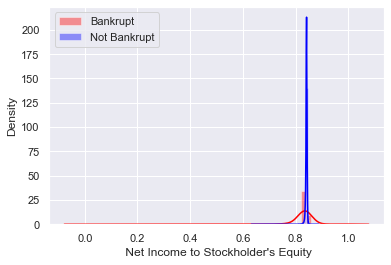

In [21]:
# 5. 'Bankrupt Vs Net Income to Stockholder's Equity"'

sns.distplot(df[df['Bankrupt']==1][" Net Income to Stockholder's Equity"],hist=True,label="Bankrupt",color='red')
sns.distplot(df[df['Bankrupt']==0][" Net Income to Stockholder's Equity"],hist=True,label="Not Bankrupt",color='blue')
plt.legend()
print("Mean :","0 - ",df[df['Bankrupt']==0][" Net Income to Stockholder's Equity"].mean(),"1 - ",df[df['Bankrupt']==1][" Net Income to Stockholder's Equity"].mean())
print("Median: ","0 - ",df[df['Bankrupt']==0][" Net Income to Stockholder's Equity"].median(),"1 - ",df[df['Bankrupt']==1][" Net Income to Stockholder's Equity"].median())

### Insight 5:
Net Income to Stockholder's Equity = Net Income / Total shareholders Equity

Now, if this value is below 1, it is not good, as it will indicate that Net income is less than the total shareholers equity.
Shareholders invested a certain amount, but not earning profit much. Rather, greater the value, better it is.

If we see the mean and median of Total shareholders Equity for the two categories bankrup or not, we get the following result:
    : 
            Not Bankrupt  Bankrupt 
    Mean      0.84        0.826
    Median    0.84        0.836 
We can see the mean and median for both and for bankrupt companies, these value is lesser. But again it is quiet close to 
not-bankrupt value. 

We will not be able to infer much from this. 

Mean : 0 -  0.8100831300151538 1 -  0.7380834792454554
Median:  0 -  0.81149184 1 -  0.766296941


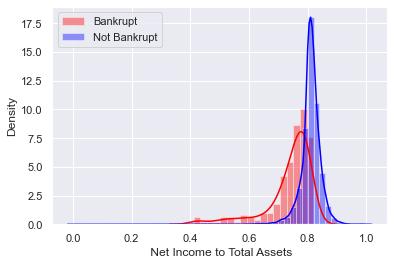

In [22]:
# 6. Bankrupt Vs Net Income to Total Assets

sns.distplot(df[df['Bankrupt']==1][' Net Income to Total Assets'],hist=True,label="Bankrupt",color='red')
sns.distplot(df[df['Bankrupt']==0][' Net Income to Total Assets'],hist=True,label="Not Bankrupt",color='blue')
plt.legend()
print("Mean :","0 - ",df[df['Bankrupt']==0][' Net Income to Total Assets'].mean(),"1 - ",df[df['Bankrupt']==1][' Net Income to Total Assets'].mean())
print("Median: ","0 - ",df[df['Bankrupt']==0][' Net Income to Total Assets'].median(),"1 - ",df[df['Bankrupt']==1][' Net Income to Total Assets'].median())

### Insight 6:

Net Income to Total Assets = Net Income / Total Asset

This shows the percentage of profit a company earns in relation to its overall resources. 
HIgher the better -- Which will mean that the company is doing well...and the net income of the company is high. 

If we see the mean and median of Net Income to Total Assets for the two categories bankrup or not, we get the following result:
    : 
            Not Bankrupt  Bankrupt 
    Mean      0.81        0.734
    Median    0.811        0.766
We can see the mean and median for both and for bankrupt companies, these value is lesser. Bankrupt comapnies may be making less
net income or may be having more debtors(Receivables) in the total asset side. (Both are not good.)

# SPLITING THE DATA IN X & Y

In [58]:
x = df1.drop(['Bankrupt'],axis=1)
y=df1['Bankrupt']
print(df1.shape)
print(y.value_counts())
print(df1['Bankrupt'].value_counts())

(6819, 78)
0    6599
1     220
Name: Bankrupt, dtype: int64
0    6599
1     220
Name: Bankrupt, dtype: int64


# SPliting the data into Train and test

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=217)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5455, 77) (1364, 77) (5455,) (1364,)


# Model Building And Ealuation of Models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [26]:
!pip install xgboost

In [27]:
names = {"LogisticRegression":LogisticRegression(),
         "DecisionTreeClassifier":DecisionTreeClassifier(criterion='gini'),
         "RandomForestClassifier":RandomForestClassifier(n_estimators=100),
         "KNeighborsClassifier":KNeighborsClassifier(),
        "AdaBoost": AdaBoostClassifier(n_estimators=50,random_state = 217),
         'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=217),
         "XGBClassifier": XGBClassifier()}

evl ={"Confusion Matrix":confusion_matrix,
      "Classification Report": classification_report,
      "Accuracy Score":accuracy_score,
      'roc_auc_score':roc_auc_score,
      'roc_curve':roc_curve}

----------------------------------------------------------------------
Using Unscaled imbalanced DATA SET
----------------------------------------------------------------------
*************************

** LogisticRegression  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train LogisticRegression


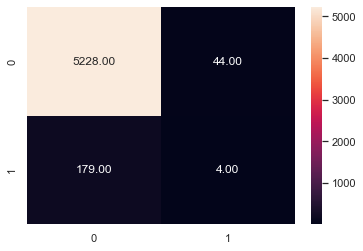

Confusion Matrix Test LogisticRegression


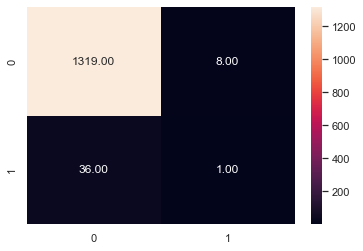

Classification Report Train LogisticRegression
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5272
           1       0.08      0.02      0.03       183

    accuracy                           0.96      5455
   macro avg       0.53      0.51      0.51      5455
weighted avg       0.94      0.96      0.95      5455

Classification Report Test LogisticRegression
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1327
           1       0.11      0.03      0.04        37

    accuracy                           0.97      1364
   macro avg       0.54      0.51      0.51      1364
weighted avg       0.95      0.97      0.96      1364

Accuracy Score Train LogisticRegression
Accuracy Score 0.9591200733272227
Accuracy Score Test LogisticRegression
Accuracy Score 0.967741935483871
roc_auc_score Train LogisticRegression
roc_auc_score 0.50675597

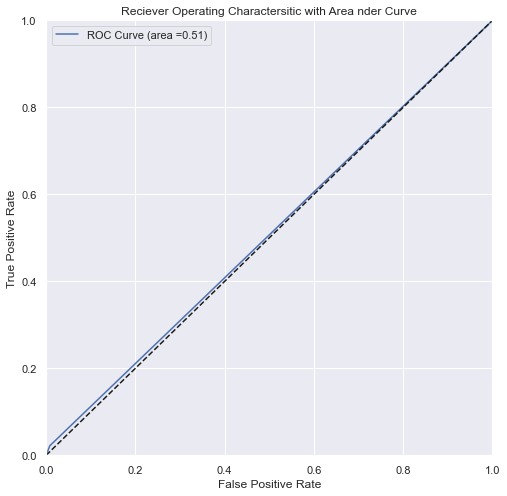

roc_curve Test LogisticRegression


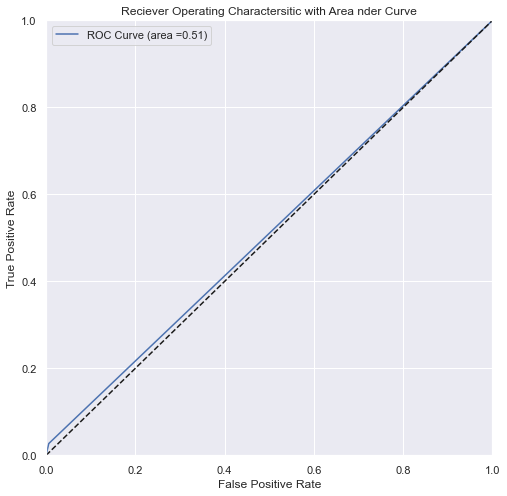

*************************

** DecisionTreeClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train DecisionTreeClassifier


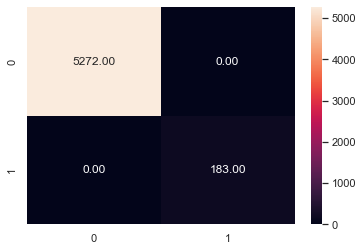

Confusion Matrix Test DecisionTreeClassifier


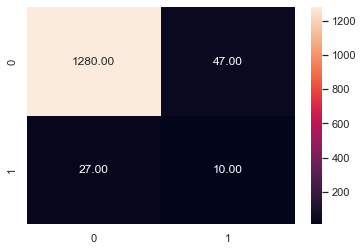

Classification Report Train DecisionTreeClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5272
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455

Classification Report Test DecisionTreeClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1327
           1       0.18      0.27      0.21        37

    accuracy                           0.95      1364
   macro avg       0.58      0.62      0.59      1364
weighted avg       0.96      0.95      0.95      1364

Accuracy Score Train DecisionTreeClassifier
Accuracy Score 1.0
Accuracy Score Test DecisionTreeClassifier
Accuracy Score 0.9457478005865103
roc_auc_score Train DecisionTreeClassifier
roc_auc_score 1.0


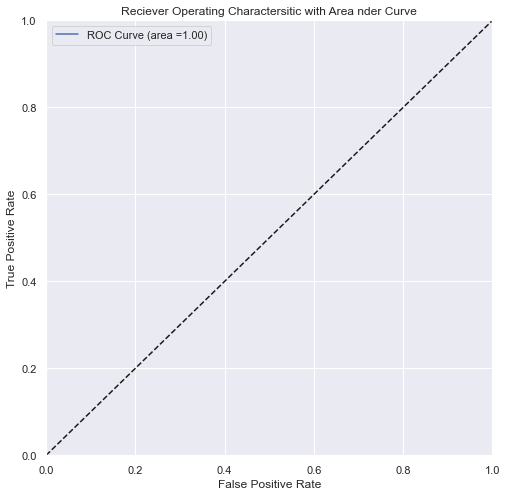

roc_curve Test DecisionTreeClassifier


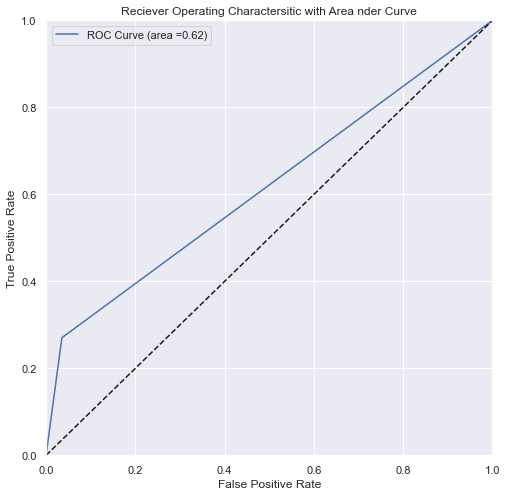

*************************

** RandomForestClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train RandomForestClassifier


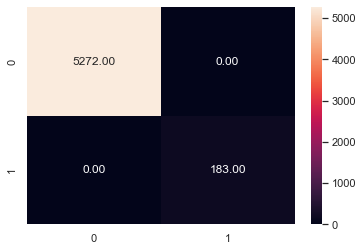

Confusion Matrix Test RandomForestClassifier


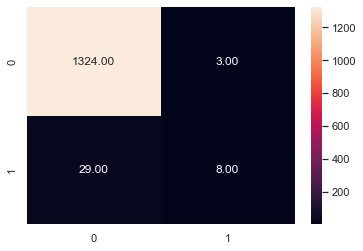

Classification Report Train RandomForestClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5272
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455

Classification Report Test RandomForestClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1327
           1       0.73      0.22      0.33        37

    accuracy                           0.98      1364
   macro avg       0.85      0.61      0.66      1364
weighted avg       0.97      0.98      0.97      1364

Accuracy Score Train RandomForestClassifier
Accuracy Score 1.0
Accuracy Score Test RandomForestClassifier
Accuracy Score 0.9765395894428153
roc_auc_score Train RandomForestClassifier
roc_auc_score 1.0


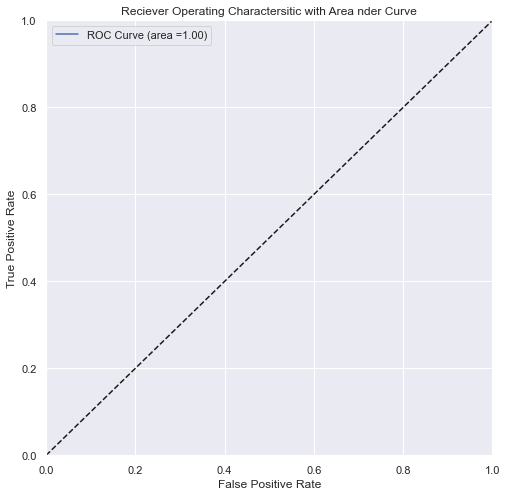

roc_curve Test RandomForestClassifier


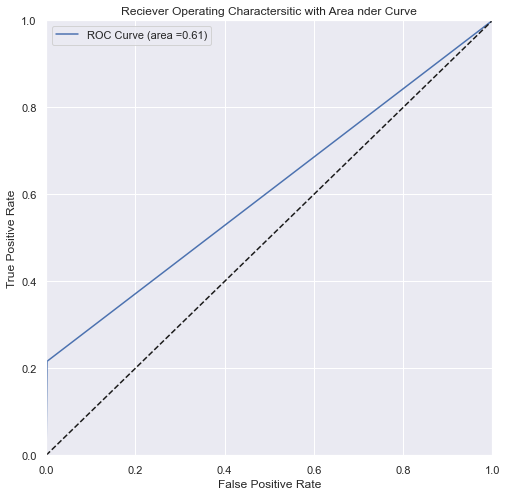

*************************

** KNeighborsClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train KNeighborsClassifier


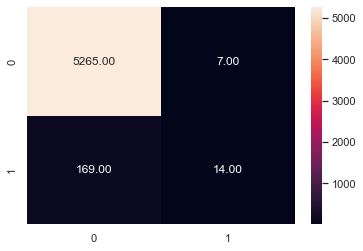

Confusion Matrix Test KNeighborsClassifier


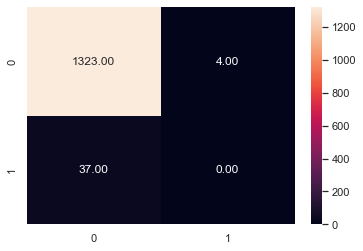

Classification Report Train KNeighborsClassifier
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5272
           1       0.67      0.08      0.14       183

    accuracy                           0.97      5455
   macro avg       0.82      0.54      0.56      5455
weighted avg       0.96      0.97      0.96      5455

Classification Report Test KNeighborsClassifier
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1327
           1       0.00      0.00      0.00        37

    accuracy                           0.97      1364
   macro avg       0.49      0.50      0.49      1364
weighted avg       0.95      0.97      0.96      1364

Accuracy Score Train KNeighborsClassifier
Accuracy Score 0.9677360219981668
Accuracy Score Test KNeighborsClassifier
Accuracy Score 0.9699413489736071
roc_auc_score Train KNeighborsClassifier
roc_auc_score

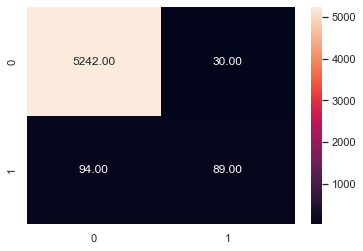

Confusion Matrix Test AdaBoost


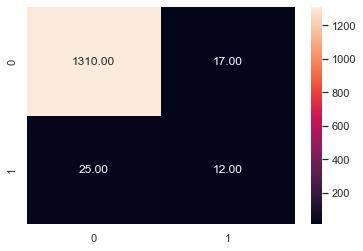

Classification Report Train AdaBoost
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5272
           1       0.75      0.49      0.59       183

    accuracy                           0.98      5455
   macro avg       0.87      0.74      0.79      5455
weighted avg       0.97      0.98      0.97      5455

Classification Report Test AdaBoost
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1327
           1       0.41      0.32      0.36        37

    accuracy                           0.97      1364
   macro avg       0.70      0.66      0.67      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train AdaBoost
Accuracy Score 0.9772685609532539
Accuracy Score Test AdaBoost
Accuracy Score 0.969208211143695
roc_auc_score Train AdaBoost
roc_auc_score 0.7403241788767547
roc_auc_score Test AdaBoost
roc_auc_score

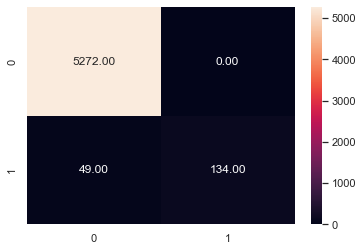

Confusion Matrix Test GradientBoostingClassifier


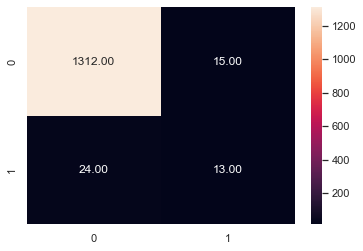

Classification Report Train GradientBoostingClassifier
Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5272
           1       1.00      0.73      0.85       183

    accuracy                           0.99      5455
   macro avg       1.00      0.87      0.92      5455
weighted avg       0.99      0.99      0.99      5455

Classification Report Test GradientBoostingClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1327
           1       0.46      0.35      0.40        37

    accuracy                           0.97      1364
   macro avg       0.72      0.67      0.69      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train GradientBoostingClassifier
Accuracy Score 0.9910174152153988
Accuracy Score Test GradientBoostingClassifier
Accuracy Score 0.9714076246334311
roc_auc_score Train GradientBo

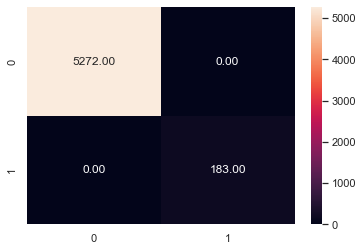

Confusion Matrix Test XGBClassifier


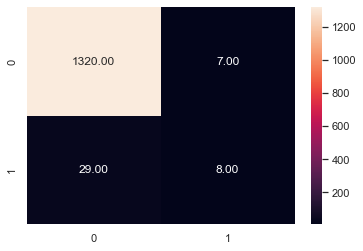

Classification Report Train XGBClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5272
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455

Classification Report Test XGBClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1327
           1       0.53      0.22      0.31        37

    accuracy                           0.97      1364
   macro avg       0.76      0.61      0.65      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train XGBClassifier
Accuracy Score 1.0
Accuracy Score Test XGBClassifier
Accuracy Score 0.9736070381231672
roc_auc_score Train XGBClassifier
roc_auc_score 1.0
roc_auc_score Test XGBClassifier
roc_auc_scor

In [28]:
print( "-----------------------------------"*2)
print("Using Unscaled imbalanced DATA SET")
print( "-----------------------------------"*2)

   
def evl_cal(name,mat,i,j,act,pred):
    if name == "Confusion Matrix":
        print(name+' '+ i +" "+j)
        sns.heatmap(confusion_matrix(act,pred),annot=True,fmt='0.2f')
        plt.show()
    elif name == 'roc_curve':
        if j == "KNeighborsClassifier" or j =="AdaBoost" or  j == "GradientBoostingClassifier" or j== "XGBClassifier":
            print() 
        else:
            print(name+' '+ i +" "+j)
            fpr,tpr,threshold=mat(act,pred)
            plt.figure(figsize=(8,8))
            plt.plot(fpr,tpr,label="ROC Curve (area =%0.2f)"%roc_auc_score(act,pred))
            plt.plot([0,1],[0,1],'k--')
            plt.xlim([0.0,1.0])
            plt.ylim([0.0,1.0])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Reciever Operating Charactersitic with Area nder Curve")
            plt.legend()
            plt.show()
    else:
        print(name+' '+ i +" "+j)
        print(name,mat(act,pred))

for index,model in names.items():
    models = model.fit(x_train,y_train)
    print("*****"*5)
    print('\n**',index," : Trained**")
    print("-----"*6)
    print("Evaluation Matrix")
    y_pred_test = models.predict(x_test)
    y_pred_train = models.predict(x_train)
    
    for name,mat in evl.items():
        evl_cal(name,mat,"Train",index,y_train,y_pred_train)
        evl_cal(name,mat,"Test",index,y_test,y_pred_test)



# OBSERVATIONS: 
    
    1. Logistic Regression : 
        a. Classification Report: Recall, precision and f1-score all shows huge difference between the 0 and 1 predictions 
            values for both training and testing datasets. Accuracy has a differnt story. 
        b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (0.96 and 0.97)
        c. Roc_Auc Score : Is average. (0.51 and 0.51) and we see the curve formed is on the threshold line. Which means, 
            we should try some other model.
            
    2. Decision Tree : 
        a. Classification Report: Recall, precision, f1-score and accuracy all shows execllent score 
        b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (1 and 0.95)
        c. Roc_Auc Score : Is average. (1 and 0.6) and we see the curve formed ok but not very good.
        
        Better than Logistic Regression.
        
    3. Random Forest : 
        a. Classification Report: Recall, precision, f1-score and accuracy all shows execllent score 
        b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (1 and 0.98) 
        c. Roc_Auc Score : Is average. (1 and 0.62) and we see the curve formed ok but not very good.
        
        Better than Logistic Regression and Decision Tree.
     
    4. K-Nearest Neighbor : 
        a. Classification Report: Recall, precision, f1-score and accuracy all shows execllent score 
        b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (0.97 and 0.97) 
        c. Roc_Auc Score : Is average. (0.53 and 0.49) and we see the curve formed not very good.
        
        Better than Logistic Regression and Decision Tree.
        
        PLAN AHEAD
        -----------
        Random Forest is the best model - for the unscaled, imbalanced dataset. But roc_auc score is not good for any. 

# Feature Scaling Only

In [29]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale=scaler.fit_transform(x)
x_scale

array([[-2.40036101e+00,  1.64558418e-02, -8.74785261e-02, ...,
        -6.00306935e-02, -9.89778824e-02, -6.22067290e-01],
       [-5.98449686e-01,  1.46705490e-02, -5.95681364e-03, ...,
         1.51298163e+01,  3.64558671e-01, -5.35573373e-01],
       [-1.31990960e+00,  7.85799500e-03, -1.42237797e-01, ...,
        -6.29611592e-02, -1.25015039e-01, -6.21959851e-01],
       ...,
       [-5.34995985e-01,  1.76282545e-02, -9.91923420e-03, ...,
        -4.78695575e-02, -1.51012998e-02,  1.00120639e+00],
       [ 7.40278436e-03,  2.44940790e-02, -1.11750324e-02, ...,
        -4.58978074e-02, -4.27044627e-03, -7.13638481e-02],
       [-6.56124393e-02, -5.18737871e-02,  8.77249629e-01, ...,
        -4.77549201e-02, -1.44543744e-02,  3.72572885e+00]])

In [30]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_scale,y,test_size= 0.2,random_state=217)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(5455, 77) (1364, 77) (5455,) (1364,)


----------------------------------------------------------------------
Using scaled imbalanced DATA SET
----------------------------------------------------------------------
*************************

** LogisticRegression  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train LogisticRegression


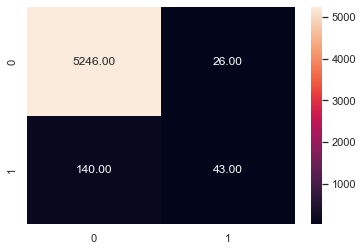

Confusion Matrix Test LogisticRegression


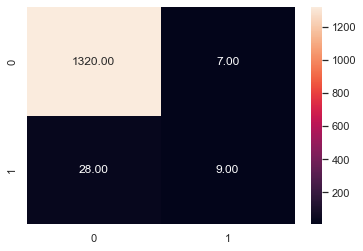

Classification Report Train LogisticRegression
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5272
           1       0.62      0.23      0.34       183

    accuracy                           0.97      5455
   macro avg       0.80      0.62      0.66      5455
weighted avg       0.96      0.97      0.96      5455

Classification Report Test LogisticRegression
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1327
           1       0.56      0.24      0.34        37

    accuracy                           0.97      1364
   macro avg       0.77      0.62      0.66      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train LogisticRegression
Accuracy Score 0.9695692025664528
Accuracy Score Test LogisticRegression
Accuracy Score 0.9743401759530792
roc_auc_score Train LogisticRegression
roc_auc_score 0.6150204

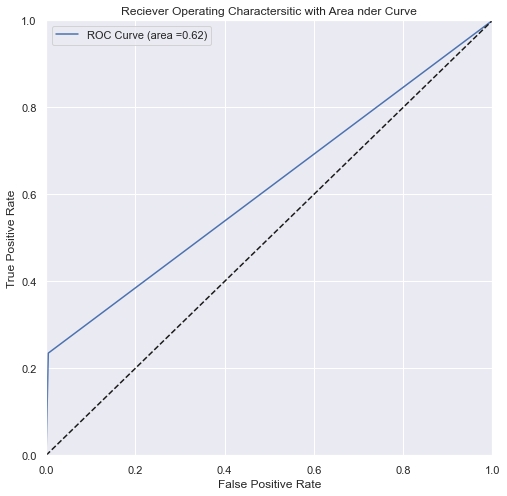

roc_curve Test LogisticRegression


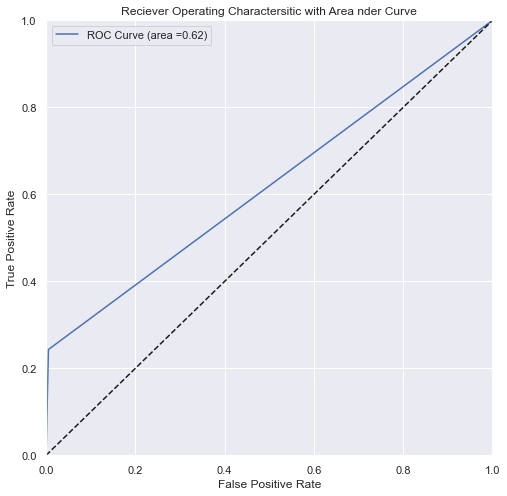

*************************

** DecisionTreeClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train DecisionTreeClassifier


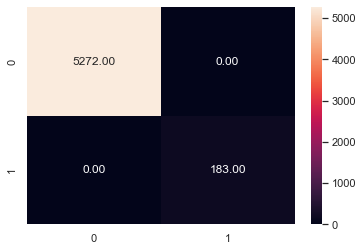

Confusion Matrix Test DecisionTreeClassifier


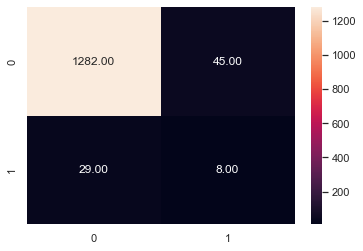

Classification Report Train DecisionTreeClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5272
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455

Classification Report Test DecisionTreeClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1327
           1       0.15      0.22      0.18        37

    accuracy                           0.95      1364
   macro avg       0.56      0.59      0.57      1364
weighted avg       0.96      0.95      0.95      1364

Accuracy Score Train DecisionTreeClassifier
Accuracy Score 1.0
Accuracy Score Test DecisionTreeClassifier
Accuracy Score 0.9457478005865103
roc_auc_score Train DecisionTreeClassifier
roc_auc_score 1.0


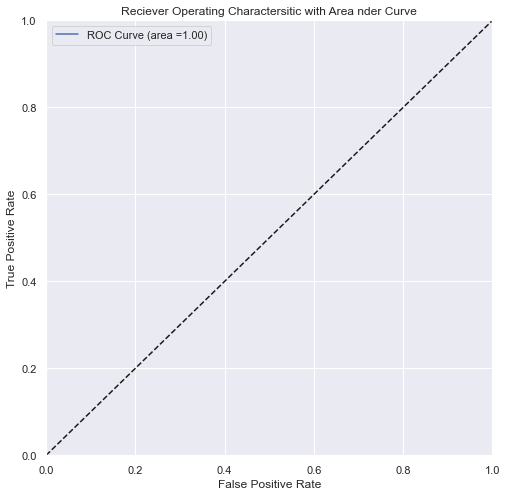

roc_curve Test DecisionTreeClassifier


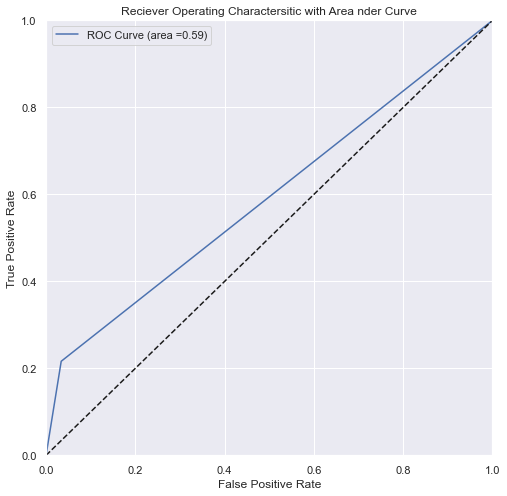

*************************

** RandomForestClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train RandomForestClassifier


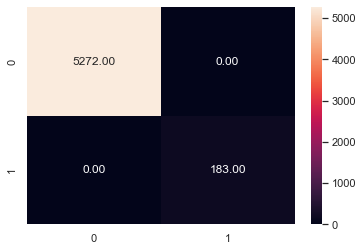

Confusion Matrix Test RandomForestClassifier


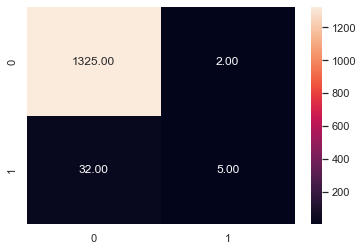

Classification Report Train RandomForestClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5272
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455

Classification Report Test RandomForestClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1327
           1       0.71      0.14      0.23        37

    accuracy                           0.98      1364
   macro avg       0.85      0.57      0.61      1364
weighted avg       0.97      0.98      0.97      1364

Accuracy Score Train RandomForestClassifier
Accuracy Score 1.0
Accuracy Score Test RandomForestClassifier
Accuracy Score 0.9750733137829912
roc_auc_score Train RandomForestClassifier
roc_auc_score 1.0


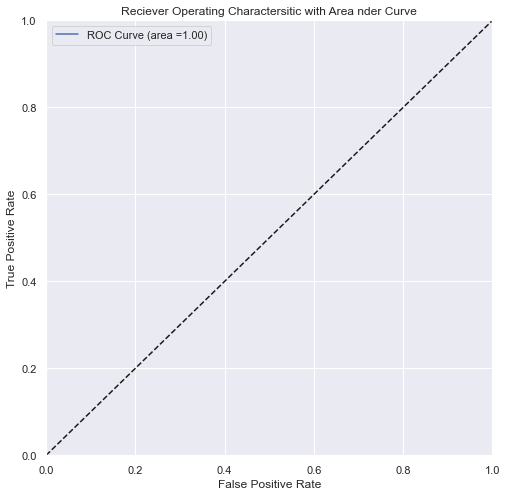

roc_curve Test RandomForestClassifier


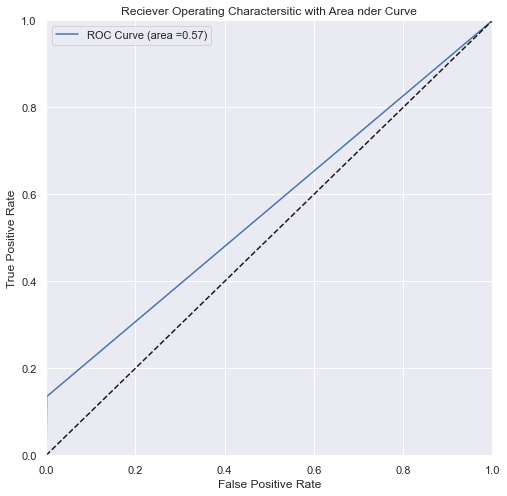

*************************

** KNeighborsClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train KNeighborsClassifier


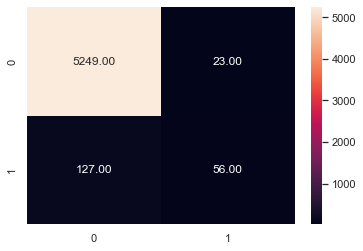

Confusion Matrix Test KNeighborsClassifier


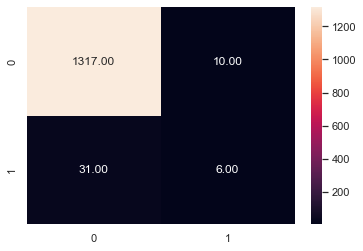

Classification Report Train KNeighborsClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5272
           1       0.71      0.31      0.43       183

    accuracy                           0.97      5455
   macro avg       0.84      0.65      0.71      5455
weighted avg       0.97      0.97      0.97      5455

Classification Report Test KNeighborsClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1327
           1       0.38      0.16      0.23        37

    accuracy                           0.97      1364
   macro avg       0.68      0.58      0.61      1364
weighted avg       0.96      0.97      0.96      1364

Accuracy Score Train KNeighborsClassifier
Accuracy Score 0.9725022914757103
Accuracy Score Test KNeighborsClassifier
Accuracy Score 0.9699413489736071
roc_auc_score Train KNeighborsClassifier
roc_auc_score

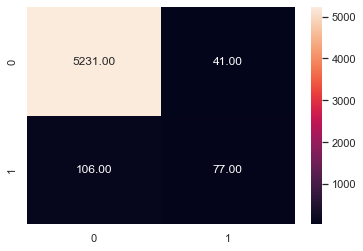

Confusion Matrix Test AdaBoost


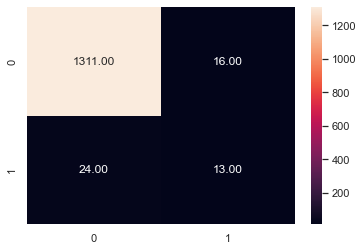

Classification Report Train AdaBoost
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5272
           1       0.65      0.42      0.51       183

    accuracy                           0.97      5455
   macro avg       0.82      0.71      0.75      5455
weighted avg       0.97      0.97      0.97      5455

Classification Report Test AdaBoost
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1327
           1       0.45      0.35      0.39        37

    accuracy                           0.97      1364
   macro avg       0.72      0.67      0.69      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train AdaBoost
Accuracy Score 0.9730522456461962
Accuracy Score Test AdaBoost
Accuracy Score 0.9706744868035191
roc_auc_score Train AdaBoost
roc_auc_score 0.7064940462863919
roc_auc_score Test AdaBoost
roc_auc_scor

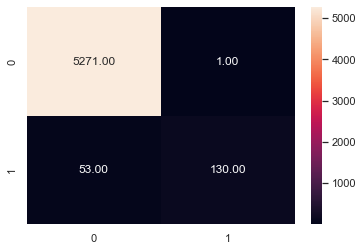

Confusion Matrix Test GradientBoostingClassifier


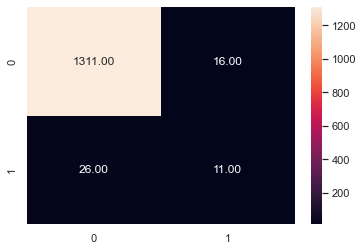

Classification Report Train GradientBoostingClassifier
Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5272
           1       0.99      0.71      0.83       183

    accuracy                           0.99      5455
   macro avg       0.99      0.86      0.91      5455
weighted avg       0.99      0.99      0.99      5455

Classification Report Test GradientBoostingClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1327
           1       0.41      0.30      0.34        37

    accuracy                           0.97      1364
   macro avg       0.69      0.64      0.66      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train GradientBoostingClassifier
Accuracy Score 0.9901008249312557
Accuracy Score Test GradientBoostingClassifier
Accuracy Score 0.969208211143695
roc_auc_score Train GradientBoo

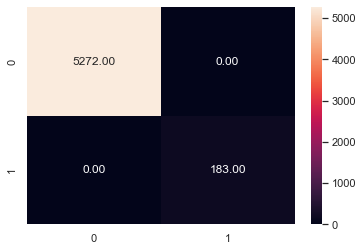

Confusion Matrix Test XGBClassifier


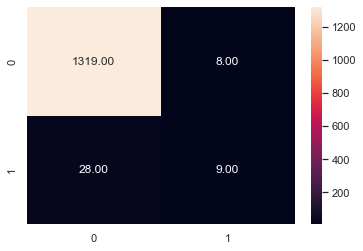

Classification Report Train XGBClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5272
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455

Classification Report Test XGBClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1327
           1       0.53      0.24      0.33        37

    accuracy                           0.97      1364
   macro avg       0.75      0.62      0.66      1364
weighted avg       0.97      0.97      0.97      1364

Accuracy Score Train XGBClassifier
Accuracy Score 1.0
Accuracy Score Test XGBClassifier
Accuracy Score 0.9736070381231672
roc_auc_score Train XGBClassifier
roc_auc_score 1.0
roc_auc_score Test XGBClassifier
roc_auc_scor

In [31]:
print( "-----------------------------------"*2)
print("Using scaled imbalanced DATA SET")
print( "-----------------------------------"*2)

   
def evl_cal(name,mat,i,j,act,pred):
    if name == "Confusion Matrix":
        print(name+' '+ i +" "+j)
        sns.heatmap(confusion_matrix(act,pred),annot=True,fmt='0.2f')
        plt.show()
    elif name == 'roc_curve':
        if j == "KNeighborsClassifier" or j =="AdaBoost" or  j == "GradientBoostingClassifier" or j== "XGBClassifier":
            print() 
        else:
            print(name+' '+ i +" "+j)
            fpr,tpr,threshold=mat(act,pred)
            plt.figure(figsize=(8,8))
            plt.plot(fpr,tpr,label="ROC Curve (area =%0.2f)"%roc_auc_score(act,pred))
            plt.plot([0,1],[0,1],'k--')
            plt.xlim([0.0,1.0])
            plt.ylim([0.0,1.0])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Reciever Operating Charactersitic with Area nder Curve")
            plt.legend()
            plt.show()
    else:
        print(name+' '+ i +" "+j)
        print(name,mat(act,pred))

for index,model in names.items():
    models = model.fit(x_train1,y_train1)
    print("*****"*5)
    print('\n**',index," : Trained**")
    print("-----"*6)
    print("Evaluation Matrix")
    y_pred_test1 = models.predict(x_test1)
    y_pred_train1 = models.predict(x_train1)
    
    for name,mat in evl.items():
        evl_cal(name,mat,"Train",index,y_train1,y_pred_train1)
        evl_cal(name,mat,"Test",index,y_test1,y_pred_test1)



# Observations

Similar result is seen as seen before the feature scaling stage. 
A little bit of improvement is there, but nothing very noteworthy.

# Feature Scaling  and Imabalance Data Treatment

In [32]:
# Handling Imbalance dataset

import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resample,y_resample = smote.fit_resample(x_scale,y)
print(x_scale.shape,y.shape,x_resample.shape,y_resample.shape)
y_resample.value_counts()

(6819, 77) (6819,) (13198, 77) (13198,)


1    6599
0    6599
Name: Bankrupt, dtype: int64

In [33]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_resample,y_resample,test_size= 0.2,random_state=217)
print(x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape)

(10558, 77) (2640, 77) (10558,) (2640,)


----------------------------------------------------------------------
Using scaled balanced DATA SET
----------------------------------------------------------------------
*************************

** LogisticRegression  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train LogisticRegression


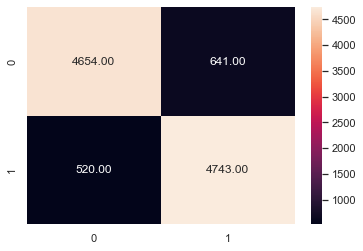

Confusion Matrix Test LogisticRegression


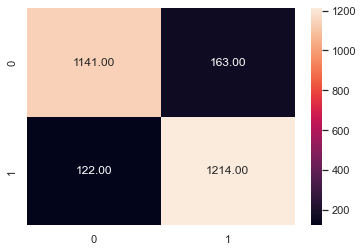

Classification Report Train LogisticRegression
Classification Report               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5295
           1       0.88      0.90      0.89      5263

    accuracy                           0.89     10558
   macro avg       0.89      0.89      0.89     10558
weighted avg       0.89      0.89      0.89     10558

Classification Report Test LogisticRegression
Classification Report               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1304
           1       0.88      0.91      0.89      1336

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

Accuracy Score Train LogisticRegression
Accuracy Score 0.8900359916650881
Accuracy Score Test LogisticRegression
Accuracy Score 0.8920454545454546
roc_auc_score Train LogisticRegression
roc_auc_score 0.8900697

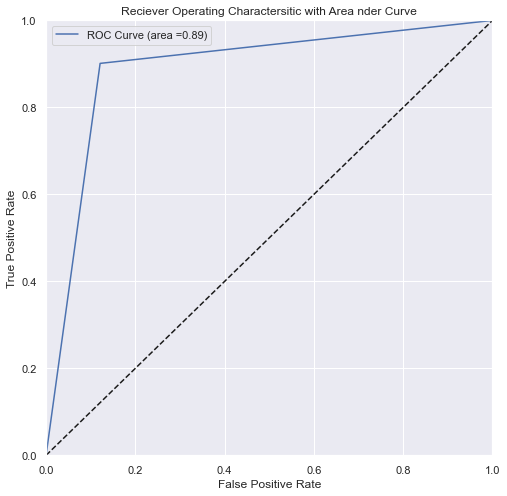

roc_curve Test LogisticRegression


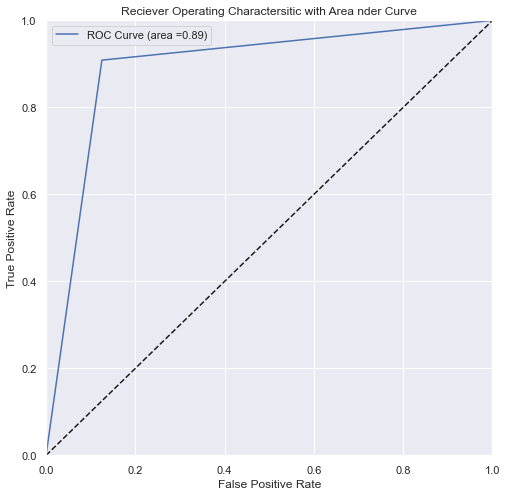

*************************

** DecisionTreeClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train DecisionTreeClassifier


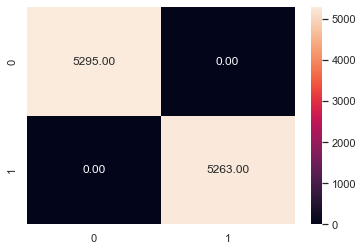

Confusion Matrix Test DecisionTreeClassifier


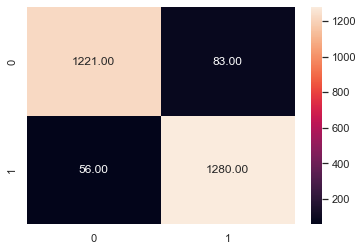

Classification Report Train DecisionTreeClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5295
           1       1.00      1.00      1.00      5263

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558

Classification Report Test DecisionTreeClassifier
Classification Report               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1304
           1       0.94      0.96      0.95      1336

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

Accuracy Score Train DecisionTreeClassifier
Accuracy Score 1.0
Accuracy Score Test DecisionTreeClassifier
Accuracy Score 0.9473484848484849
roc_auc_score Train DecisionTreeClassifier
roc_auc_score 1.0


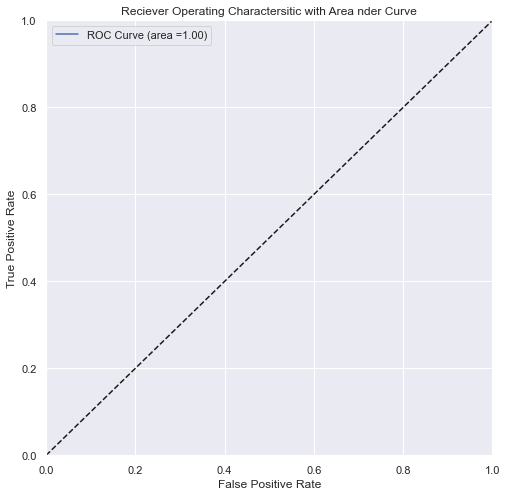

roc_curve Test DecisionTreeClassifier


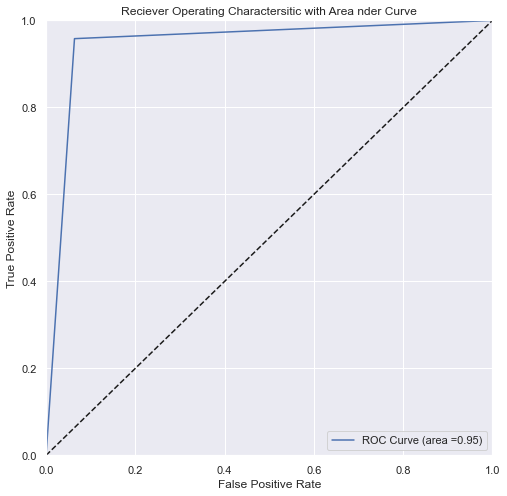

*************************

** RandomForestClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train RandomForestClassifier


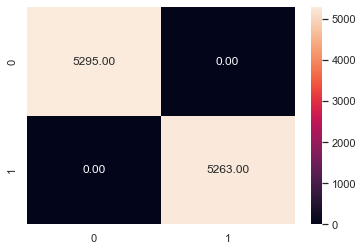

Confusion Matrix Test RandomForestClassifier


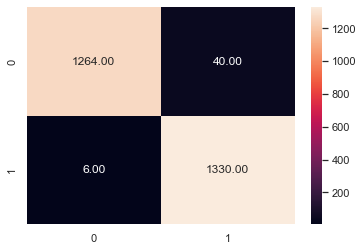

Classification Report Train RandomForestClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5295
           1       1.00      1.00      1.00      5263

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558

Classification Report Test RandomForestClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1304
           1       0.97      1.00      0.98      1336

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Accuracy Score Train RandomForestClassifier
Accuracy Score 1.0
Accuracy Score Test RandomForestClassifier
Accuracy Score 0.9825757575757575
roc_auc_score Train RandomForestClassifier
roc_auc_score 1.0


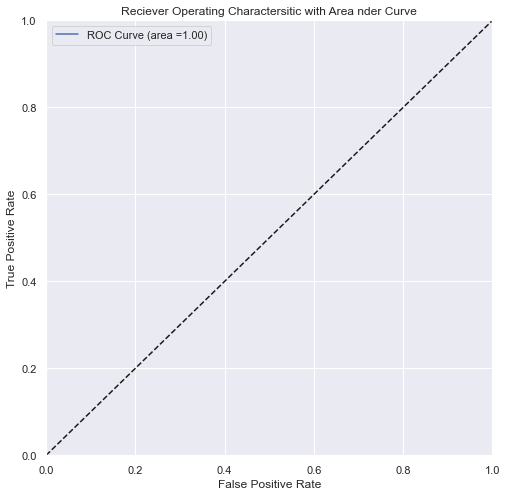

roc_curve Test RandomForestClassifier


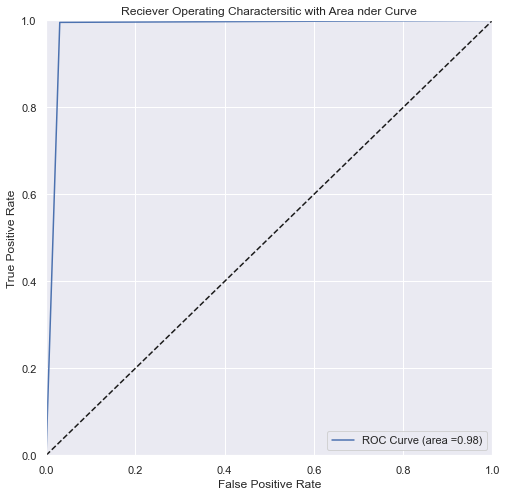

*************************

** KNeighborsClassifier  : Trained**
------------------------------
Evaluation Matrix
Confusion Matrix Train KNeighborsClassifier


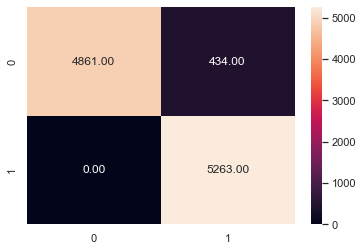

Confusion Matrix Test KNeighborsClassifier


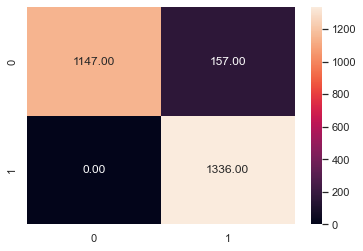

Classification Report Train KNeighborsClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      0.92      0.96      5295
           1       0.92      1.00      0.96      5263

    accuracy                           0.96     10558
   macro avg       0.96      0.96      0.96     10558
weighted avg       0.96      0.96      0.96     10558

Classification Report Test KNeighborsClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      0.88      0.94      1304
           1       0.89      1.00      0.94      1336

    accuracy                           0.94      2640
   macro avg       0.95      0.94      0.94      2640
weighted avg       0.95      0.94      0.94      2640

Accuracy Score Train KNeighborsClassifier
Accuracy Score 0.958893729873082
Accuracy Score Test KNeighborsClassifier
Accuracy Score 0.940530303030303
roc_auc_score Train KNeighborsClassifier
roc_auc_score 0

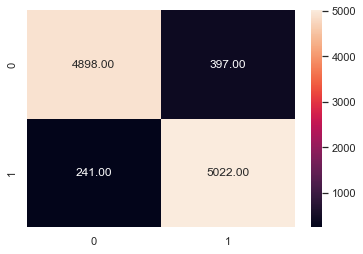

Confusion Matrix Test AdaBoost


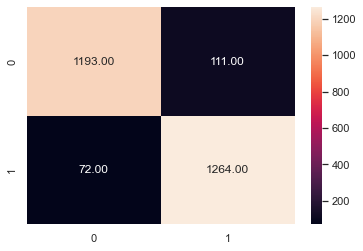

Classification Report Train AdaBoost
Classification Report               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5295
           1       0.93      0.95      0.94      5263

    accuracy                           0.94     10558
   macro avg       0.94      0.94      0.94     10558
weighted avg       0.94      0.94      0.94     10558

Classification Report Test AdaBoost
Classification Report               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1304
           1       0.92      0.95      0.93      1336

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640

Accuracy Score Train AdaBoost
Accuracy Score 0.9395718886152681
Accuracy Score Test AdaBoost
Accuracy Score 0.9306818181818182
roc_auc_score Train AdaBoost
roc_auc_score 0.9396161167176847
roc_auc_score Test AdaBoost
roc_auc_scor

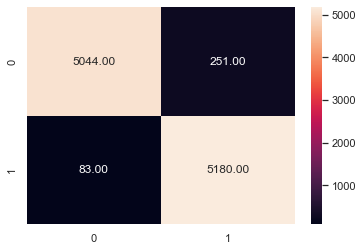

Confusion Matrix Test GradientBoostingClassifier


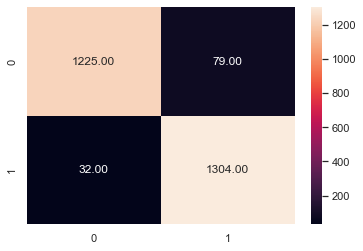

Classification Report Train GradientBoostingClassifier
Classification Report               precision    recall  f1-score   support

           0       0.98      0.95      0.97      5295
           1       0.95      0.98      0.97      5263

    accuracy                           0.97     10558
   macro avg       0.97      0.97      0.97     10558
weighted avg       0.97      0.97      0.97     10558

Classification Report Test GradientBoostingClassifier
Classification Report               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1304
           1       0.94      0.98      0.96      1336

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

Accuracy Score Train GradientBoostingClassifier
Accuracy Score 0.9683652206857359
Accuracy Score Test GradientBoostingClassifier
Accuracy Score 0.9579545454545455
roc_auc_score Train GradientBo

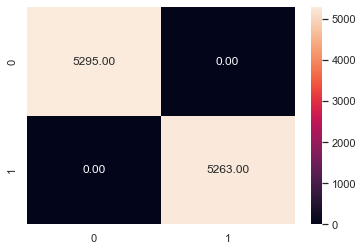

Confusion Matrix Test XGBClassifier


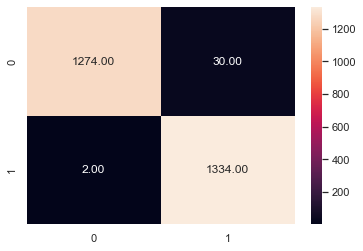

Classification Report Train XGBClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5295
           1       1.00      1.00      1.00      5263

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558

Classification Report Test XGBClassifier
Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1304
           1       0.98      1.00      0.99      1336

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

Accuracy Score Train XGBClassifier
Accuracy Score 1.0
Accuracy Score Test XGBClassifier
Accuracy Score 0.9878787878787879
roc_auc_score Train XGBClassifier
roc_auc_score 1.0
roc_auc_score Test XGBClassifier
roc_auc_scor

In [34]:
print( "-----------------------------------"*2)
print("Using scaled balanced DATA SET")
print( "-----------------------------------"*2)

   
def evl_cal(name,mat,i,j,act,pred):
    if name == "Confusion Matrix":
        print(name+' '+ i +" "+j)
        sns.heatmap(confusion_matrix(act,pred),annot=True,fmt='0.2f')
        plt.show()
    elif name == 'roc_curve':
        if j == "KNeighborsClassifier" or j =="AdaBoost" or  j == "GradientBoostingClassifier" or j== "XGBClassifier":
            print()
        else:
            print(name+' '+ i +" "+j)
            fpr,tpr,threshold=mat(act,pred)
            plt.figure(figsize=(8,8))
            plt.plot(fpr,tpr,label="ROC Curve (area =%0.2f)"%roc_auc_score(act,pred))
            plt.plot([0,1],[0,1],'k--')
            plt.xlim([0.0,1.0])
            plt.ylim([0.0,1.0])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Reciever Operating Charactersitic with Area nder Curve")
            plt.legend()
            plt.show()
    else:
        print(name+' '+ i +" "+j)
        print(name,mat(act,pred))

for index,model in names.items():
    models = model.fit(x_train2,y_train2)
    print("*****"*5)
    print('\n**',index," : Trained**")
    print("-----"*6)
    print("Evaluation Matrix")
    y_pred_test2 = models.predict(x_test2)
    y_pred_train2 = models.predict(x_train2)
    
    for name,mat in evl.items():
        evl_cal(name,mat,"Train",index,y_train2,y_pred_train2)
        evl_cal(name,mat,"Test",index,y_test2,y_pred_test2)



# Observations

1. Logistic Regression : 
    a. Classification Report: Recall, precision and f1-score, accuracy all are good. (0.89+)  
    b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (0.89 and 0.89)
    c. Roc_Auc Score : Is really good. (0.89 and 0.89) and we see the curve above the threshold line. Good model as of now.


2. Decision Tree : 
    a. Classification Report: Recall, precision, f1-score and accuracy all shows execllent score 
    b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (1 and 0.95)
    c. Roc_Auc Score : Is average. (1 and 0.96) and we see the curve formed is excellent. 

    Better than Logistic Regression.

3. Random Forest : 
    a. Classification Report: Recall, precision, f1-score and accuracy all shows execllent score 
    b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (1 and 0.98) 
    c. Roc_Auc Score : Is average. (1 and 0.98) and we see the curve formed is excellent.

    Better than Logistic Regression and Decision Tree and KNN.
    
4. K-Nearest Neighbor : 
    a. Classification Report: Recall, precision, f1-score and accuracy all shows execllent score 
    b. Accuracy Score : The accuracy score is great. Doesn't show any bias or variance. (0.95 and 0.94) 
    c. Roc_Auc Score : Is average. (0.95 and 0.94) and we see the curve formed is again execllent.

    Better than Logistic Regression and Decision Tree.
    
   
BEST MODEL - RANDOM FOREST. 

# Checking the overfitting problem in the model - Regularization

In [35]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [36]:
#Unscaled and Imbalanced
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_ridge_pred = ridge.predict(x_test)
y_ridge_pred = np.where(y_ridge_pred > 0.5, 1, 0)
print("Ridge Accuracy Score : ",accuracy_score(y_test,y_ridge_pred))

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_lasso_pred = lasso.predict(x_test)
y_lasso_pred = np.where(y_lasso_pred > 0.5,1,0)
print("Lasso Accuracy Score : ",accuracy_score(y_test,y_lasso_pred))

en = ElasticNet(alpha=0.1)
en.fit(x_train,y_train)
y_en_pred = en.predict(x_test)
y_en_pred = np.where(y_en_pred > 0.5, 1, 0)
print("ElasticNet Accuracy Score : ",accuracy_score(y_test,y_en_pred))

Ridge Accuracy Score :  0.9728739002932552
Lasso Accuracy Score :  0.9728739002932552
ElasticNet Accuracy Score :  0.9728739002932552


In [37]:
#SClaed Imbalanced
ridge = Ridge(alpha=0.1)
ridge.fit(x_train1,y_train1)
y_ridge_pred = ridge.predict(x_test1)
y_ridge_pred = np.where(y_ridge_pred > 0.5, 1, 0)
print("Ridge Accuracy Score : ",accuracy_score(y_test1,y_ridge_pred))

lasso = Lasso(alpha=0.1)
lasso.fit(x_train1,y_train1)
y_lasso_pred = lasso.predict(x_test1)
y_lasso_pred = np.where(y_lasso_pred > 0.5,1,0)
print("Lasso Accuracy Score : ",accuracy_score(y_test1,y_lasso_pred))

en = ElasticNet(alpha=0.1)
en.fit(x_train1,y_train1)
y_en_pred = en.predict(x_test1)
y_en_pred = np.where(y_en_pred > 0.5, 1, 0)
print("ElasticNet Accuracy Score : ",accuracy_score(y_test1,y_en_pred))

Ridge Accuracy Score :  0.9736070381231672
Lasso Accuracy Score :  0.9728739002932552
ElasticNet Accuracy Score :  0.9728739002932552


In [38]:
#SCaled Balanced
ridge = Ridge(alpha=0.1)
ridge.fit(x_train2,y_train2)
y_ridge_pred = ridge.predict(x_test2)
y_ridge_pred = np.where(y_ridge_pred > 0.5, 1, 0)
print("Ridge Accuracy Score : ",accuracy_score(y_test2,y_ridge_pred))

lasso = Lasso(alpha=0.1)
lasso.fit(x_train2,y_train2)
y_lasso_pred = lasso.predict(x_test2)
y_lasso_pred = np.where(y_lasso_pred > 0.5,1,0)
print("Lasso Accuracy Score : ",accuracy_score(y_test2,y_lasso_pred))

en = ElasticNet(alpha=0.1)
en.fit(x_train2,y_train2)
y_en_pred = en.predict(x_test2)
y_en_pred = np.where(y_en_pred > 0.5, 1, 0)
print("ElasticNet Accuracy Score : ",accuracy_score(y_test2,y_en_pred))

Ridge Accuracy Score :  0.8799242424242424
Lasso Accuracy Score :  0.8647727272727272
ElasticNet Accuracy Score :  0.8723484848484848


# Stacking Classifier
Reconfirming if Random FOrest is the best model for this data or not. 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = KNeighborsClassifier()
clf5 = GaussianNB()
clf6 = AdaBoostClassifier()
clf7 = GradientBoostingClassifier()
clf8 = XGBClassifier()

sclf = StackingClassifier(classifiers=[clf2,clf3,clf4,clf5],meta_classifier =clf1)

for clf, label in zip([clf2,clf3,clf4,clf5,clf6,clf7,clf8,sclf],['Decision Tree','Random Forest','KNeighors','GaussianNB',
                                                  'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']):
    scores = cross_val_score(clf,x_train,y_train,cv = 5,scoring = 'accuracy')
    print('Accuracy : %0.2f (+/-%0.2f)[%s]'%(scores.mean(),scores.std(),label))

Accuracy : 0.95 (+/-0.00)[Decision Tree]
Accuracy : 0.97 (+/-0.00)[Random Forest]
Accuracy : 0.96 (+/-0.00)[KNeighors]
Accuracy : 0.07 (+/-0.01)[GaussianNB]
Accuracy : 0.97 (+/-0.00)[AdaBoostClassifier]
Accuracy : 0.97 (+/-0.00)[GradientBoostingClassifier]
Accuracy : 0.97 (+/-0.00)[XGBClassifier]


From stacking also, we get that Random Forest and all boosting methods are good. 
We can definetly go with Random Forest or  XGBoost.

All the scores looks very good. No overfitting issue is there with any of the datasets.

# DONE